In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

## Load Datasets

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape # 50000 images to train

(50000, 32, 32, 3)

In [4]:
X_test.shape # 10000 images to test

(10000, 32, 32, 3)

## Preprocessing

In [5]:
# Reshaping the labels to a single array
y_train = y_train.reshape(-1,)

In [8]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def showImage(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

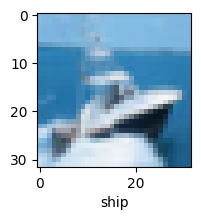

In [9]:
showImage(X_train, y_train, 8)

In [10]:
# Normalize X_train/test
X_train = X_train/255
X_test = X_test/255

## Building the Model

In [71]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [74]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Model

In [75]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


2023-05-09 03:16:25.732863: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 12s 6ms/step - loss: 1.6762 - accuracy: 0.3804 - val_loss: 1.3019 - val_accuracy: 0.5371
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3253 - accuracy: 0.5247 - val_loss: 1.1672 - val_accuracy: 0.5902
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2013 - accuracy: 0.5749 - val_loss: 1.0503 - val_accuracy: 0.6375
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1148 - accuracy: 0.6057 - val_loss: 0.9474 - val_accuracy: 0.6685
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0698 - accuracy: 0.6248 - val_loss: 0.9516 - val_accuracy: 0.6646
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0229 - accuracy: 0.6405 - val_loss: 0.8965 - val_accuracy: 0.6928
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9938 - accuracy: 0.6524 - val_loss: 0.8559 - val_accuracy: 0.7089
E

## Making Predictions

In [76]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
y_predictions[9]

array([1.04207415e-02, 5.04993141e-01, 2.83537083e-03, 2.14426749e-04,
       1.13339673e-04, 9.06460686e-04, 3.32665746e-04, 7.94680091e-04,
       1.01239663e-02, 4.69265252e-01], dtype=float32)

In [82]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [55]:
y_test_reshaped = y_test.reshape(-1,)

In [56]:
y_classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [57]:
y_predictions[8]

3

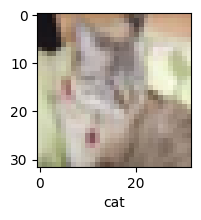

In [58]:
showImage(X_test, y_test_reshaped, 8)

## Evaluate the Model

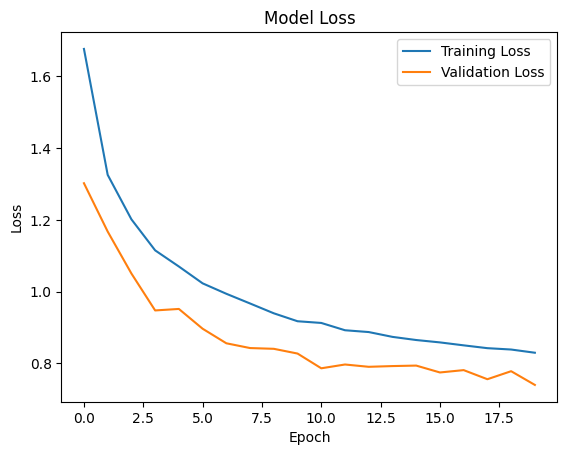

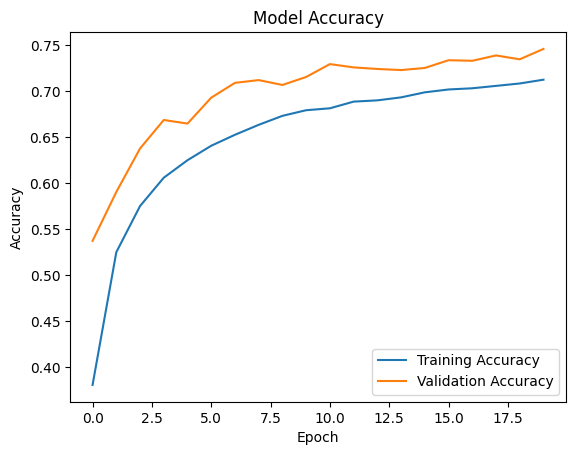

In [85]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7399 - accuracy: 0.7458


[0.7398563027381897, 0.7458000183105469]

In [79]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1000
           1       0.89      0.89      0.89      1000
           2       0.68      0.60      0.64      1000
           3       0.50      0.66      0.57      1000
           4       0.72      0.68      0.70      1000
           5       0.62      0.68      0.65      1000
           6       0.80      0.81      0.80      1000
           7       0.82      0.75      0.79      1000
           8       0.85      0.86      0.85      1000
           9       0.86      0.82      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000

